
# Explorando MNIST y redes neuronales profundas

El propósito de este documento es ayudarlo a aprender sobre redes neuronales profundas y explorar cómo el cambio de la arquitectura de una red neuronal afecta el rendimiento de la red. 

Antes de poder construir redes neuronales, necesitamos importar algunas cosas de Keras y preparar nuestros datos. El siguiente código extrae el conjunto de datos MNIST, proporcionado por Keras, y corvierte las imágenes de 28x28 píxeles en un vector con una longitud 784. Además, modifica las etiquetas de un valor numérico 0-9 a un vector *one-hot encoded*.

*One-hot encoding* hace referencia a un grupo de bits entre los cuales las combinaciones validas de valores son solo aquellas con un solo bit alto (1) y todas las demás bajas (0).

<center><img src="https://i.imgur.com/wKtY1Og.png" alt="drawing" width="400"/>





In [ ]:
import tensorflow as tf
import keras
from keras.datasets import mnist
#from tensorflow.keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from keras.layers import Dense #capas fully connected
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint
import numpy as np

from keras.utils import to_categorical ##############################

print(tf. __version__)
# Preparar el conjunto de datos
# Configurar la división del entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Hacer una copia antes de convertir a 1D 
# esta copia se usa para mostrar las imágenes
x_train_drawing = x_train

image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size)  #vector de 784, flattening 
x_test = x_test.reshape(x_test.shape[0], image_size)

# Convierte vectores de clase en matrices de clases binarias (one-hot encoding)
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(y_test)
print(x_train.shape) #m=num de ejemplos = 60 000, n=784 (features)
print(x_test.shape)

2.11.0
11490434/11490434 [==============================] - 0s 0us/step
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(60000, 784)
(10000, 784)


## Un vistazo a algunos dígitos al azar

Es bueno tener una idea del conjunto de datos con el que estamos trabajando. Ejecute este código varias veces para ver los nuevos dígitos seleccionados al azar del conjunto de entrenamiento. 

[5, 4, 3, 2]


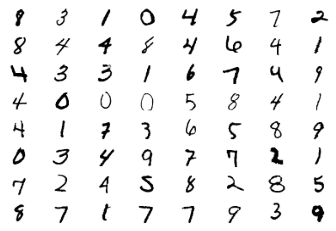

In [ ]:

#iteramos desde i=0 hasta 63. De manera general range(start, stop, step)
print(list(range(5,1,-1)))
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

#verificado: por cada ejecucion, se obtiene una imagen, un conjunto de datos, distinto 
#pero con las mismas caracteristicas

## **0.1 Primera red (3 puntos)**

Aquí hay una primera red simple para resolver MNIST. Tiene una sola capa oculta con 32 nodos.  

1.   *La red tiene un total de 25450 parámetros entrenables. Demuestre cómo Keras calcula el número de parámetros entrenables en esta arquitectura*

La red neuronal cuenta con dos capas. Una capa oculta y otra capa de salida. Es por ello qué, el número de parámetros entrenables depende del número de unidades en la capa actual y en la capa anterior. Keras se encarga de calcular el número de parámetros del siguiente modo: La capa de entrada cuenta con 784 nodos, puesto qué es el resultado de la multiplicación de 28 x 28. Por otro lado, la capa oculta tiene 32 nodos y la capa de salida tiene 10 nodos. Ahora, es imprescindible tomar en cuenta qué, al ser una red neural densa, existe bias en cada capa oculta. Es por ello que hay 784 parámetros entrenables. Por tal motivo la red tiene un total de 25450 parámetros entrenables.

El cálculo vendría dado de la siguiente manera (Los términos de suma son debidos al elemento de bias que se debe agregar en la capa de input y en la capa oculta): 



*   De la capa de input a la capa oculta: 784 x 32 + 32 = 25120
*   De la capa oculta a la capa de salida: 32 x 10 + 10 = 330
*   El total de parámetros entrenables es: 25450.




2.   *Qué significa `None` en la forma de salida (output shape) que se muestra como `(None,32)`*?

El número 32 qué se encuentra en la forma de salida indica qué la capa oculta tiene 32 neuronas, del mismo modo, indica qué la salida de la capa oculta es un vector de 32 elementos. Por otro lado, la palabra "None" indica qué la cantidad de muestras puede ser variable y no está definida.

None implica que el input de la red neuronal puede ser más de una muestra a la vez. Es decir, implica que esta dimensión es variable (en algunos ejemplos encontrados en internet se especifica que este campo corresponde al batch size del modelo). Se recuerda que el batch size implica que el modelo hará uso de varias imágenes de 28x28 al mismo tiempo.



3. *cuál es la función de activación softmax y su relación con la sigmoide?*

La función de activación softmax es una función qué se emplea en las redes neuronales para transformar un conjunto de datos en una distribución de probabilidad. La relación qué existe entre la función de activación softmax y la sigmoide es qué la función softmax es una generalización de la función Sigmoide.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


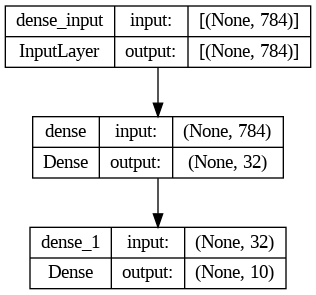

In [ ]:
model = Sequential()

# La capa de entrada requiere el parámetro especial input_shape que debe 
# coincidir con la forma de nuestros datos de entrenamiento.
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,))) #Input and Hidden Layer
model.add(Dense(units=num_classes, activation='softmax')) #output Layer. Si num_classes = 2 (pos y neg): model.add(Dense(units=1, activation='sigmoid')) equivalente model.add(Dense(units=2, activation='softmax'))  
model.summary() # REPRESENTAR
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## **0.2 Entrenar y evaluar la red (7 puntos)**

Este código entrena y evalúa el modelo que definimos anteriormente. También usa `matplotlib` y el objeto `history` proporcionado por Keras, que rastrea cómo se comporta el modelo a través de su entrenamiento. Observe que usamos el objeto `history` para trazar la precisión del entrenamiento y la precisión de la validación a lo largo del tiempo (*epochs*).



1.   *En el siguiente código, la función de costo o pérdida (loss function) está definida como `'categorical_crossentropy'`. Consulte cuál es la forma matemática de esta función y explique sus parámetros.*

La función de costo está definida como: 

$L(y, \hat{y}) = - \sum_{i=1}^{C} y_i \log(\hat{y}_i)$

Es una función empleada comúnmente  en problemas de clasificación en los que las etiquetas de los datos están en formato one-hot encoding. Mide la discrepancia entre la distribución de probabilidad de las predicciones de la red neuronal y la distribución de probabilidad real de las etiquetas.



2.   *Cuál es la diferencia entra la función de costo de entropía cruzada (Cross-Entropy loss) con respecto a la función de costo definida para la regresión logística?*

La diferencia qué existe entre la función de costo de entropía cruzada (Cross-Entropy loss) con respecto a la función de costo definida para la regresión logística, es qué la función de costo se emplea para clasificar un conjunto de datos en una clasificación de N clases. Por otro lado, la función de costo definida para la regresión logística se usa para clasificar un conjunto de datos en una clasificación de 2 clases.

3. *Consulte las diferencias entre minibatch gradient descent, batch gradient descent y Stochastic gradient descent.*

Minibatch gradient descent, batch gradient descent y Stochastic gradient descent, son 3 algoritmos de optimización que se emplean en el aprendizaje automático. Sus principales diferencias son: 
  *  Batch gradient descent: Actualiza parámetros del modelo, una vez calculada la suma de las contribuciones de la función de pérdida para todos los ejemplos de entrenamiento. Puede llegar a ser preciso, pero del mismo modo, puede ser lento. 

  * Stochastic gradient descent : Calcula el gradiente de la función de pérdida para un solo ejemplo de entrenamiento y se utiliza para actualizar los parámetros del modelo antes de pasar al siguiente ejemplo. Es más rápido qué el anterior, pero puede ser menos preciso.

  * Minibatch gradient descent: Emplea un subconjunto de tamaño fijo de los datos de entrenamiento. Es una combinación de Batch gradient descent y Stochastic gradient descent. 


4. *Según lo consultado en el punto anterior, qué tipo de gradient descent (batch, minibatch o stochastic) describe la función de costo para la red neuronal estudiada en clase? Justifique su respuesta.*

Según lo consultado, la función de costo para gradient descent es  Minibatch gradient descent, porque mediante un subconjunto, calcula el gradiente de la función con respecto a los parámetros de la red neuronal.


5. *Explique qué significa una época en una red neuronal (epoch)*

Una época en una red neuronal es una iteración completa a través de todo el conjunto de datos de entrenamiento durante el proceso de entrenamiento del modelo. Para entrenar una red neuronal, usualmente se usan varias épocas.


6. *Explique qué es el tamaño del batch de una red neuronal.*

El tamaño del batch en una red neuronal se refiere  a la cantidad de datos de entrenamiento o cantidad de ejemplos de entrenamiento que se emplean para obtener el gradiente de la función de costo. 


7. *Cuál es la diferencia entre tamaño del batch y época?*

La principal diferencia entre tamaño del batch y época es qué el tamaño del batch es el número de datos de entrenamiento que se emplean para obtener el gradiente. Por otro lado, una época es cuando se ha recorrido todos los datos de entrenamiento una vez.



Epoch 1/200
422/422 [==============================] - 2s 4ms/step - loss: 1.3516 - accuracy: 0.6539 - val_loss: 0.9080 - val_accuracy: 0.8372
Epoch 2/200
422/422 [==============================] - 2s 4ms/step - loss: 0.8246 - accuracy: 0.8339 - val_loss: 0.6664 - val_accuracy: 0.8723
Epoch 3/200
422/422 [==============================] - 2s 4ms/step - loss: 0.6584 - accuracy: 0.8630 - val_loss: 0.5429 - val_accuracy: 0.8940
Epoch 4/200
422/422 [==============================] - 2s 6ms/step - loss: 0.5669 - accuracy: 0.8774 - val_loss: 0.4794 - val_accuracy: 0.9025
Epoch 5/200
422/422 [==============================] - 2s 5ms/step - loss: 0.5106 - accuracy: 0.8857 - val_loss: 0.4388 - val_accuracy: 0.9110
Epoch 6/200
422/422 [==============================] - 2s 4ms/step - loss: 0.4685 - accuracy: 0.8926 - val_loss: 0.4004 - val_accuracy: 0.9077
Epoch 7/200
422/422 [==============================] - 2s 4ms/step - loss: 0.4370 - accuracy: 0.8977 - val_loss: 0.3846 - val_accuracy: 0.9157

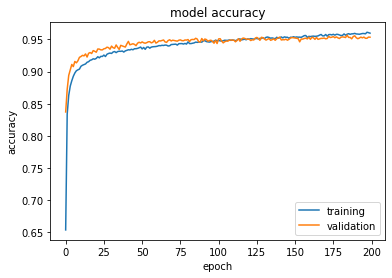

Test loss: 0.187
Test accuracy: 0.945
Shape of my predictions (test set): (10000, 10)
First prediction for number 6, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]


In [ ]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy']) #LOSS = COST function. EVALUAR.
history = model.fit(x_train, y_train, batch_size=128, epochs=200, verbose=True, validation_split=.1) #fit = OPTIMIZAR.
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False) #evalua en la última época, no necesariamente la mejor. Ver checkpoints y monitors.
mypredictions  = model.predict(x_test)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')
print(f'Shape of my predictions (test set): {mypredictions.shape}')
yidx = np.argmax(y_test, axis=1) #from one hot encoding to integers
mypidx = mypredictions[1,:]
np.set_printoptions(precision=3, suppress=True)
print(f'First prediction for number {yidx[100]}, probabilities: {mypidx}')

## Algunas Ayudas

Hay un par de cosas que haremos repetidamente en este notebook:

* Construir un modelo, y
* Evaluar ese modelo.


Estas funciones nos ayudarán a comparar "manzanas con manzanas", ya que podemos estar seguros de que cuando llamamos a `create_dense` y `evaluate` nuestros modelos y régimen de entrenamiento utilizarán los mismos **hiperparámetros**. Ambos usan algunas de las variables declaradas anteriormente y, por lo tanto, ambos están explícitamente destinados a trabajar con el conjunto de datos MNIST.

`create_dense` acepta una matriz del tamaños de la  capa y devuelve un modelo Keras de una red neuronal completamente conectada con los tamaños de capa especificados. Por ejemplo, `create_dense ([32, 64, 128])` devolverá una red neuronal profundamente conectada con tres capas ocultas, la primera con 32 nodos, la segunda con 64 nodos y la tercera con 128 nodos.

`create_dense` usa la variable `image_size` declarada anteriormente, lo que significa que asume que los datos de entrada serán un vector con 784 unidades. Todas las capas ocultas usan la función de activación sigmoid, excepto la capa de salida, que usa softmax.

`evaluate` imprime un resumen del modelo, entrena el modelo y luego imprime la pérdida y la precisión. Esta función siempre ejecuta 5 épocas de entrenamiento y utiliza un *tamaño de batch* fijo de 128 entradas por *batch*. También utiliza los datos MNIST extraídos de Keras que procesamos anteriormente.



In [ ]:
def create_dense(layer_sizes):
    model = Sequential()
    #from tensorflow.keras import regularizers
    #kernel_regularizer=regularizers.L2(1e-4)
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))#aqui añadir kernel_regularizer

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid')) #aqui añadir kernel_regularizer

    model.add(Dense(units=num_classes, activation='softmax'))
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
    return model

def evaluate(model, batch_size=128, epochs=5, verbose=False):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) #accuracy = 1 - error
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=verbose) #entrenando 
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False) #YA NO ENTRENA PERO EVALUA EN EL CONJ DE TEST.
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')
    print(f'Shape of my predictions (test set): {mypredictions.shape}')
    yidx = np.argmax(y_test, axis=1) #from one hot encoding to integers
    mypidx = mypredictions[1,:]
    np.set_printoptions(precision=3, suppress=True)
    print(f'First prediction for number {yidx[1]}, probabilities: {mypidx}')

# Ejemplo de uso de las funciones creadas
A continuacion se muestra un ejemplo de como usar las anteriores funciones.
El lazo `for` genera 2 iteraciones. En la primera iteración, layers = 1 y se genera un modelo con 2 capas de 32 nodos cada una. En la segunda iteración, layers = 2 y se genera un modelo con 4 capas de 32 nodos debido a que se repite dos veces la matriz [32, 32] * 2 = [32, 32, 32, 32].

Para la evaluacion del modelo se usa la funcion `evaluate` con los parametros batch_size=128 y epochs=10.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 2s 4ms/step - loss: 2.1547 - accuracy: 0.3389 - val_loss: 2.0253 - val_accuracy: 0.5055
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 1.9355 - accuracy: 0.5321 - val_loss: 1.8238 - val_accuracy: 0.5998
Epoch 3/10
422/422 [==========

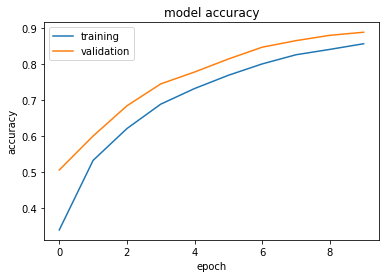


Test loss: 0.727
Test accuracy: 0.868
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                25120     
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                         

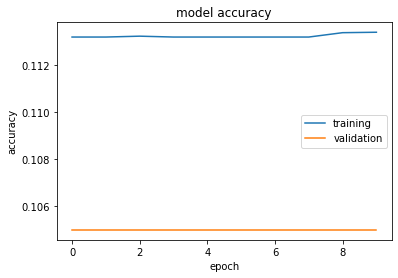


Test loss: 2.28
Test accuracy: 0.113
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]


In [ ]:
for layers in [1, 2]:
    #print(i)
    model = create_dense([32, 32] * layers)
    evaluate(model, batch_size=128, epochs=10, verbose=True) #verbose por defecto es false

#EQUIVALENTE del for
#model = create_dense([32, 32]) #2 hidden layers de 32 nodos cada una
#evaluate(model, batch_size=128, epochs=10, verbose=True)

#model = create_dense([32, 32, 32, 32]) #4 hidden layers de 32 nodos cada una
#evaluate(model, batch_size=128, epochs=10, verbose=True)


## **1. Comparar redes más complejas (4 puntos)**


*  Ahora entrene y evalúe modelos con **diferente números de capas** ocultas. Todas las capas ocultas deben tener 32 nodos. El primer modelo tiene 1 capa oculta, el segundo 2 ... hasta cuatro capas.  Analice la exactitud obtenida en cada caso.

*Evalue el modelo con los parametros por defecto*





Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                25120     
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 2s 4ms/step - loss: 1.4687 - accuracy: 0.6226 - val_loss: 0.9988 - val_accuracy: 0.8167
Epoch 2/10
422/422 [==============================] - 1s 3ms/step - loss: 0.9011 - accuracy: 0.8179 - val_loss: 0.7333 - val_accuracy: 0.8625
Epoch 3/10
422/422 [==============================] - 1s 3ms/step - loss: 0.7144 - accuracy: 0.8531 - val_loss: 0.6083 - val_accuracy: 0.8830
Epoch 4/10
422/422 [

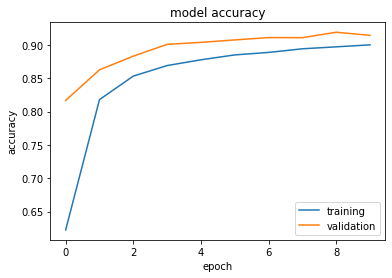


Test loss: 0.394
Test accuracy: 0.898
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                25120     
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 2s 4ms/step - loss: 2.1828 - accuracy: 0.3756 - val_loss: 2.0203 

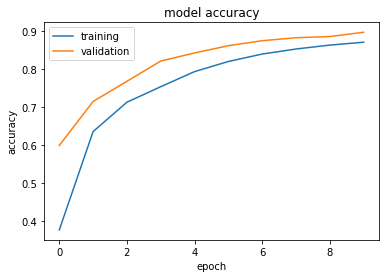


Test loss: 0.634
Test accuracy: 0.88
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                25120     
                                                                 
 dense_16 (Dense)            (None, 32)                1056      
                                                                 
 dense_17 (Dense)            (None, 32)                1056      
                                                                 
 dense_18 (Dense)            (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
______________________________________________________

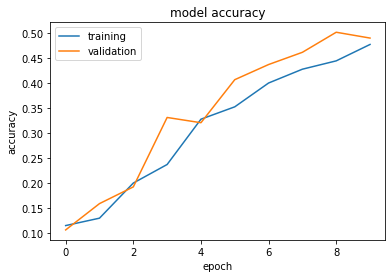


Test loss: 1.88
Test accuracy: 0.48
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 32)                25120     
                                                                 
 dense_20 (Dense)            (None, 32)                1056      
                                                                 
 dense_21 (Dense)            (None, 32)                1056      
                                                                 
 dense_22 (Dense)            (None, 32)                1056      
                                                                 
 dense_23 (Dense)            (None, 10)                330       
                                                           

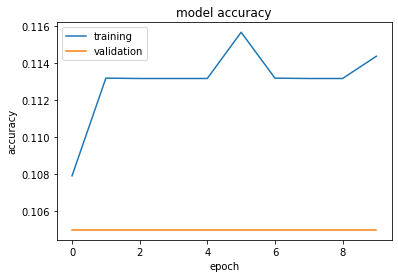


Test loss: 2.28
Test accuracy: 0.113
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]


In [ ]:

#ESCRIBA SU CÓDIGO AQUÍ.
#ejemplo para 4 capas ocultas de 32 nodos
#model = create_dense([32, 32, 32, 32]) #4 hidden layers de 32 nodos cada una
#evaluate(model, batch_size=128, epochs=100, verbose=True)

for layers in [1, 2, 3, 4]:
    #print(i)
    model = create_dense([32] * layers)
    evaluate(model, batch_size=128, epochs=10, verbose=True) #verbose por defecto es false

# Análisis de la exactitud obtenida en cada caso

* **Caso de 1 capa de 32 nodos:** Exactitud de $0.898$
* **Caso de 2 capas de 32 nodos:** Exactitud de $0.88$
* **Caso de 3 capas de 32 nodos:** Exactitud de $0.48$
* **Caso de 4 capas de 32 nodos:** Exactitud de $0.113$

Como se puede ver, la exactitud va bajando conforme se aumentan capas. Esto puede deberse al bajo número de epochs que se está utilizando. 

## **2. Redes más profundas tardan más en entrenar (4 puntos)**

Segun lo observado en el ejemplo anterior, las redes más profundas toman más tiempo para entrenar. Esto tiene que ver con la retropropagación (backpropagation), el descenso de gradiente y la forma en que funcionan los algoritmos de optimización: esos detalles están más allá del alcance de este ejercicio.
Sin embargo, tenga en cuenta lo que sucede cuando dejamos que la red anterior de 3 capas ocultas, que tenía un rendimiento mediocre, entrene por más tiempo. Para esto, realice lo siguiente

*  Cree una red con 3 capas ocultas de 32 nodos ([32, 32, 32]) pero esta vez entrene durante 40 épocas. Qué sucedió? Comente sus resultados.

Mantenga el resto de parámetros por defecto. Puede usar la opción `verbose=True` para llamar a la función `evaluate` para ver en pantalla los resultados por época. Discuta sus resultados.


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                25120     
                                                                 
 dense_25 (Dense)            (None, 32)                1056      
                                                                 
 dense_26 (Dense)            (None, 32)                1056      
                                                                 
 dense_27 (Dense)            (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
422/422 [==============================] - 3s 5ms/step - loss: 2.3068 - accuracy: 0.1051 - val_loss: 2.2748 - val_accuracy: 0.1590
Epoch 2/40
422/422 [====================

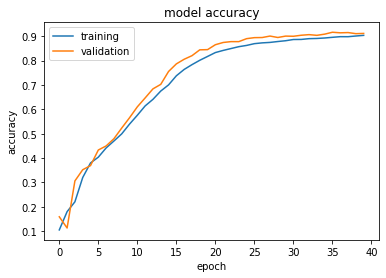


Test loss: 0.41
Test accuracy: 0.899
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]


In [ ]:
model = create_dense([32] * 3)
evaluate(model, batch_size=128, epochs=40, verbose=True) #verbose por defecto es false

# Discusión de resultados

Al aumentar el número de epochs de 10 a 40, el tiempo de ejecución de la capa aumenta considerablemente, pero en lo obtenido se puede observar dos cosas:

* **El loss obtenido es mucho menor, pasando de $2.3068$ a $0.41$**
* **El accuracy obtenido es mucho mayor, pasando de $0.1051$ a $0.899$**

### **3. Comparación del número de nodos (i.e., unidades o neuronas) por capa (4 puntos)**

Otra forma de incrementar la complejidad es agregar más nodos **(i.e., unidades o neuronas)** a cada capa oculta. Cree varias redes neuronales de una capa, con cada vez más nodos en esa capa. Pruebe con 32, 64, 128, 256, 512, 1024 y 2048 nodos. Comente sus resultados.

Note que esta vez al crear el modelo usando `create_dense`, el lazo `for` iterara sobre el numero de nodos [32, 64, 128, 256, 512, 1024, 2048]

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 32)                25120     
                                                                 
 dense_29 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 3s 6ms/step - loss: 1.3690 - accuracy: 0.6495 - val_loss: 0.8933 - val_accuracy: 0.8340
Epoch 2/10
422/422 [==============================] - 1s 3ms/step - loss: 0.8217 - accuracy: 0.8311 - val_loss: 0.6339 - val_accuracy: 0.8895
Epoch 3/10
422/422 [==============================] - 1s 3ms/step - loss: 0.6522 - accuracy: 0.8614 - val_loss: 0.5251 - val_accuracy: 0.8985
Epoch 4/10
422/422 [

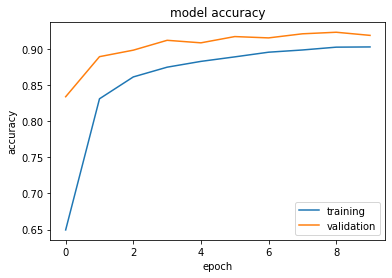


Test loss: 0.376
Test accuracy: 0.906
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                50240     
                                                                 
 dense_31 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 2s 4ms/step - loss: 1.1490 - accuracy: 0.7115 - val_loss: 0.6821 - val_accuracy: 0.8592
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.6401 - accuracy: 0.8517 - val_los

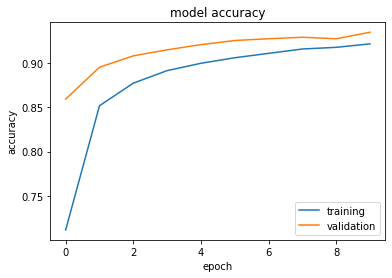


Test loss: 0.299
Test accuracy: 0.921
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 128)               100480    
                                                                 
 dense_33 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 4s 7ms/step - loss: 1.0030 - accuracy: 0.7470 - val_loss: 0.5463 - val_accuracy: 0.8838
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.5307 - accuracy: 0.8708 - val_

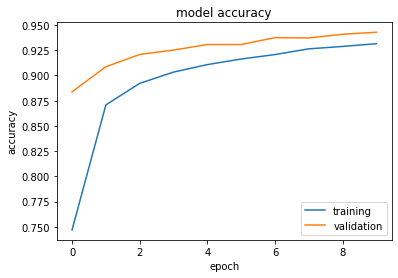


Test loss: 0.251
Test accuracy: 0.934
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 256)               200960    
                                                                 
 dense_35 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 3s 6ms/step - loss: 0.8798 - accuracy: 0.7679 - val_loss: 0.4524 - val_accuracy: 0.8973
Epoch 2/10
422/422 [==============================] - 3s 6ms/step - loss: 0.4465 - accuracy: 0.8863 - val_

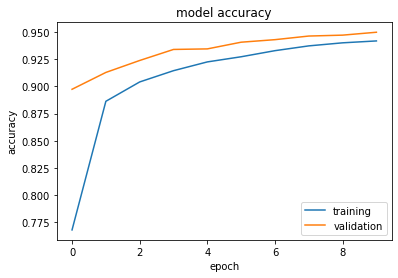


Test loss: 0.218
Test accuracy: 0.938
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 512)               401920    
                                                                 
 dense_37 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 8s 18ms/step - loss: 0.7501 - accuracy: 0.8055 - val_loss: 0.3755 - val_accuracy: 0.9088
Epoch 2/10
422/422 [==============================] - 4s 9ms/step - loss: 0.3793 - accuracy: 0.9007 - val

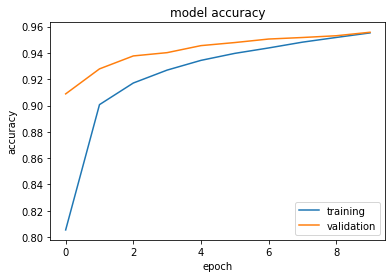


Test loss: 0.19
Test accuracy: 0.946
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 1024)              803840    
                                                                 
 dense_39 (Dense)            (None, 10)                10250     
                                                                 
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 7s 16ms/step - loss: 0.6061 - accuracy: 0.8440 - val_loss: 0.3093 - val_accuracy: 0.9253
Epoch 2/10
422/422 [==============================] - 7s 16ms/step - loss: 0.3187 - accuracy: 0.9151 - val

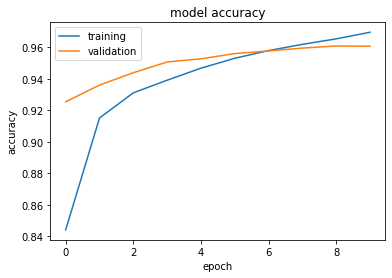


Test loss: 0.168
Test accuracy: 0.952
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 2048)              1607680   
                                                                 
 dense_41 (Dense)            (None, 10)                20490     
                                                                 
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 14s 33ms/step - loss: 0.4938 - accuracy: 0.8680 - val_loss: 0.2497 - val_accuracy: 0.9363
Epoch 2/10
422/422 [==============================] - 14s 32ms/step - loss: 0.2576 - accuracy: 0.931

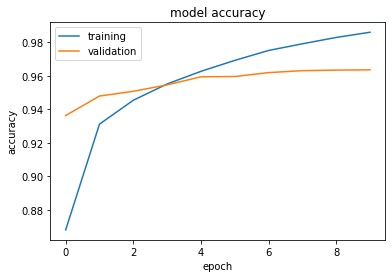


Test loss: 0.146
Test accuracy: 0.957
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]


In [ ]:
for nodes in [32, 64, 128, 256, 512, 1024, 2048]:
    #print(i)
    model = create_dense([nodes] * 1)
    evaluate(model, batch_size=128, epochs=10, verbose=True) #verbose por defecto es false

# Comentario sobre resultados:

Al aumentar el número de nodos utilizados en una sola capa, se obtiene el mismo resultado que al aumentar el número de epochs del ejemplo anterior: **el accuracy obtenido mejora (aumenta) al igual que el loss obtenido (disminuye).** Esto se puede ver en los resultados:

* Una capa con $32$ nodos: **Accuracy de $0.906$**
* Una capa con $64$ nodos: **Accuracy de $0.921$**
* Una capa con $128$ nodos: **Accuracy de $0.934$**
* Una capa con $256$ nodos: **Accuracy de $0.938$**
* Una capa con $512$ nodos: **Accuracy de $0.946$**
* Una capa con $1024$ nodos: **Accuracy de $0.952$**
* Una capa con $2048$ nodos: **Accuracy de $0.957$**


## **4. Más nodos y más capas (4 puntos)**

Ahora que hemos visto la cantidad de nodos y la cantidad de capas en un contexto aislado, veamos qué sucede cuando combinamos estos dos factores.

*   4.1 Cree un código que genere modelos con un numero de capas que se incrementan de 1 a 5. Cada capa debe tener 32 nodos. Entrene el modelo con 10 épocas por cada capa, i.e., `epochs=10*layers`. De este modo, el primero modelo tendrá 1 capa de 32 nodos y entrenará durante 10 épocas, el segundo modelo tendrá 2 capas de 32 nodos y entrenará durante 20 épocas y así sucesivamente.
*   4.2 Repita el código anterior pero esta vez cada capa tendrá 128 nodos.
*   4.3 Repita el código anterior pero esta vez cada capa tendrá 512 nodos.

Discuta sus resultados.

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 32)                25120     
                                                                 
 dense_43 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 2s 4ms/step - loss: 1.4622 - accuracy: 0.6209 - val_loss: 0.9809 - val_accuracy: 0.8193
Epoch 2/10
422/422 [==============================] - 1s 3ms/step - loss: 0.8842 - accuracy: 0.8192 - val_loss: 0.7018 - val_accuracy: 0.8765
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 0.6962 - accuracy: 0.8574 - val_loss: 0.5606 - val_accuracy: 0.9003
Epoch 4/10
422/422 

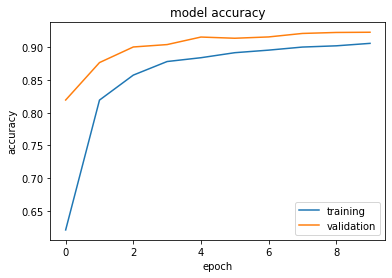


Test loss: 0.362
Test accuracy: 0.909
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 32)                25120     
                                                                 
 dense_45 (Dense)            (None, 32)                1056      
                                                                 
 dense_46 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
422/422 [==============================] - 2s 4ms/step - loss: 2.1300 - accuracy: 0.3829 - val_loss: 1.9395

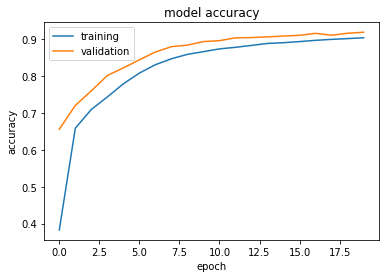


Test loss: 0.392
Test accuracy: 0.907
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 32)                25120     
                                                                 
 dense_48 (Dense)            (None, 32)                1056      
                                                                 
 dense_49 (Dense)            (None, 32)                1056      
                                                                 
 dense_50 (Dense)            (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
____________________________________________________

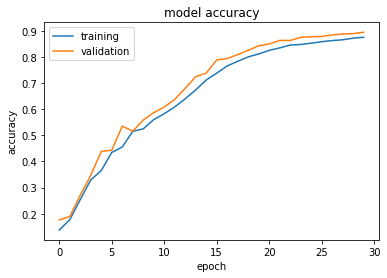


Test loss: 0.548
Test accuracy: 0.88
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 32)                25120     
                                                                 
 dense_52 (Dense)            (None, 32)                1056      
                                                                 
 dense_53 (Dense)            (None, 32)                1056      
                                                                 
 dense_54 (Dense)            (None, 32)                1056      
                                                                 
 dense_55 (Dense)            (None, 10)                330       
                                                         

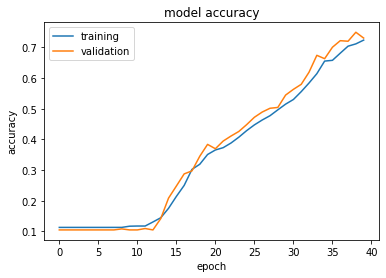


Test loss: 0.984
Test accuracy: 0.725
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 32)                25120     
                                                                 
 dense_57 (Dense)            (None, 32)                1056      
                                                                 
 dense_58 (Dense)            (None, 32)                1056      
                                                                 
 dense_59 (Dense)            (None, 32)                1056      
                                                                 
 dense_60 (Dense)            (None, 32)                1056      
                                                        

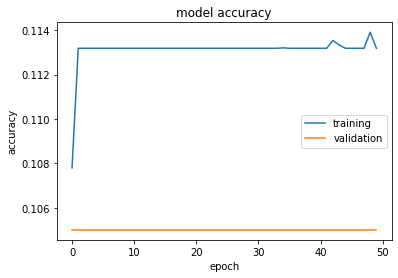


Test loss: 2.29
Test accuracy: 0.113
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]


In [ ]:
#PARTE 4.1 ESCRIBA SU CÓDIGO AQUÍ.
for layers in [1, 2, 3, 4, 5]:
    model = create_dense([32] * layers)
    evaluate(model, batch_size=128, epochs=10*layers, verbose=True) #verbose por defecto es false

# Discusión

Test loss: 0.362
Test accuracy: 0.909

Test loss: 0.392
Test accuracy: 0.907

Test loss: 0.548
Test accuracy: 0.88

Test loss: 0.984
Test accuracy: 0.725

Test loss: 2.29
Test accuracy: 0.113

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 128)               100480    
                                                                 
 dense_63 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 3s 5ms/step - loss: 1.0763 - accuracy: 0.7236 - val_loss: 0.5830 - val_accuracy: 0.8823
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.5508 - accuracy: 0.8692 - val_loss: 0.4174 - val_accuracy: 0.9062
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.4335 - accuracy: 0.8916 - val_loss: 0.3478 - val_accuracy: 0.9180
Epoch 4/10
422/42

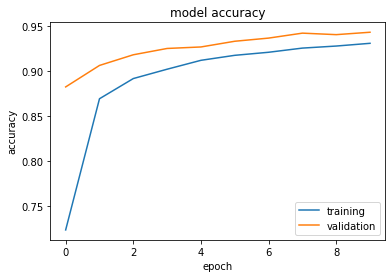


Test loss: 0.246
Test accuracy: 0.932
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 128)               100480    
                                                                 
 dense_65 (Dense)            (None, 128)               16512     
                                                                 
 dense_66 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
422/422 [==============================] - 3s 7ms/step - loss: 1.9777 - accuracy: 0.5280 - val_loss: 1.64

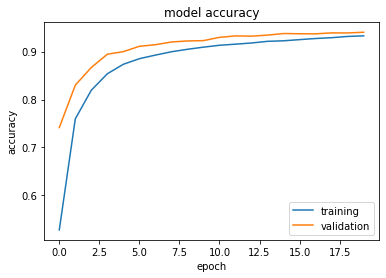


Test loss: 0.252
Test accuracy: 0.93
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 128)               100480    
                                                                 
 dense_68 (Dense)            (None, 128)               16512     
                                                                 
 dense_69 (Dense)            (None, 128)               16512     
                                                                 
 dense_70 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
___________________________________________________

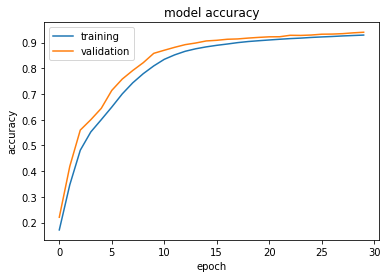


Test loss: 0.279
Test accuracy: 0.928
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 128)               100480    
                                                                 
 dense_72 (Dense)            (None, 128)               16512     
                                                                 
 dense_73 (Dense)            (None, 128)               16512     
                                                                 
 dense_74 (Dense)            (None, 128)               16512     
                                                                 
 dense_75 (Dense)            (None, 10)                1290      
                                                        

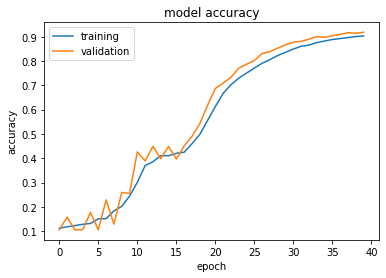


Test loss: 0.422
Test accuracy: 0.9
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 128)               100480    
                                                                 
 dense_77 (Dense)            (None, 128)               16512     
                                                                 
 dense_78 (Dense)            (None, 128)               16512     
                                                                 
 dense_79 (Dense)            (None, 128)               16512     
                                                                 
 dense_80 (Dense)            (None, 128)               16512     
                                                          

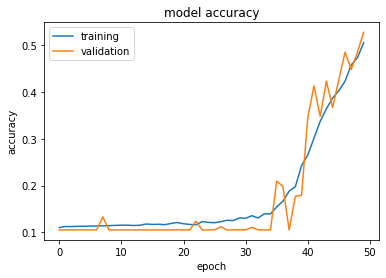


Test loss: 1.45
Test accuracy: 0.521
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]


In [ ]:
#PARTE 4.2 ESCRIBA SU CÓDIGO AQUÍ.
for layers in [1, 2, 3, 4, 5]:
    model = create_dense([128] * layers)
    evaluate(model, batch_size=128, epochs=10*layers, verbose=True) #verbose por defecto es false

# Dicusión

Test loss: 0.246
Test accuracy: 0.932

Test loss: 0.252
Test accuracy: 0.93

Test loss: 0.279
Test accuracy: 0.928

Test loss: 0.422
Test accuracy: 0.9

Test loss: 1.45
Test accuracy: 0.521

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 512)               401920    
                                                                 
 dense_85 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 5s 11ms/step - loss: 0.7327 - accuracy: 0.8096 - val_loss: 0.3734 - val_accuracy: 0.9082
Epoch 2/10
422/422 [==============================] - 4s 9ms/step - loss: 0.3783 - accuracy: 0.9002 - val_loss: 0.2888 - val_accuracy: 0.9255
Epoch 3/10
422/422 [==============================] - 4s 10ms/step - loss: 0.3097 - accuracy: 0.9170 - val_loss: 0.2503 - val_accuracy: 0.9348
Epoch 4/10
422/

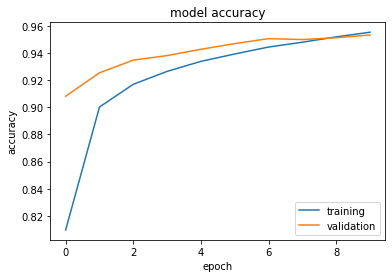


Test loss: 0.192
Test accuracy: 0.945
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 512)               401920    
                                                                 
 dense_87 (Dense)            (None, 512)               262656    
                                                                 
 dense_88 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
422/422 [==============================] - 7s 17ms/step - loss: 1.6736 - accuracy: 0.6373 - val_loss: 1.1

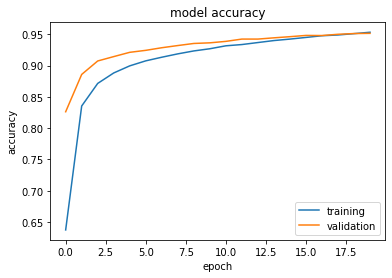


Test loss: 0.203
Test accuracy: 0.943
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_89 (Dense)            (None, 512)               401920    
                                                                 
 dense_90 (Dense)            (None, 512)               262656    
                                                                 
 dense_91 (Dense)            (None, 512)               262656    
                                                                 
 dense_92 (Dense)            (None, 10)                5130      
                                                                 
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
__________________________________________________

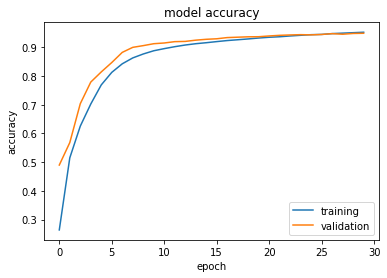


Test loss: 0.218
Test accuracy: 0.935
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 512)               401920    
                                                                 
 dense_94 (Dense)            (None, 512)               262656    
                                                                 
 dense_95 (Dense)            (None, 512)               262656    
                                                                 
 dense_96 (Dense)            (None, 512)               262656    
                                                                 
 dense_97 (Dense)            (None, 10)                5130      
                                                        

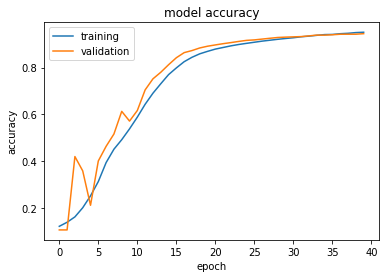


Test loss: 0.253
Test accuracy: 0.933
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 512)               401920    
                                                                 
 dense_99 (Dense)            (None, 512)               262656    
                                                                 
 dense_100 (Dense)           (None, 512)               262656    
                                                                 
 dense_101 (Dense)           (None, 512)               262656    
                                                                 
 dense_102 (Dense)           (None, 512)               262656    
                                                        

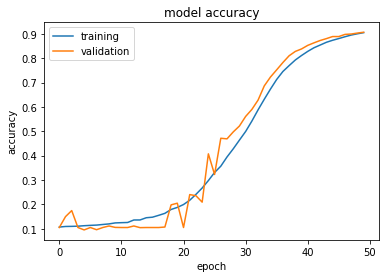


Test loss: 0.439
Test accuracy: 0.895
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]


In [ ]:
#PARTE 4.3 ESCRIBA SU CÓDIGO AQUÍ.
for layers in [1, 2, 3, 4, 5]:
    model = create_dense([512] * layers)
    evaluate(model, batch_size=128, epochs=10*layers, verbose=True) #verbose por defecto es false

#Discusión

Test loss: 0.191
Test accuracy: 0.945

Test loss: 0.201
Test accuracy: 0.942

Test loss: 0.217
Test accuracy: 0.939

Test loss: 0.255
Test accuracy: 0.932

Test loss: 0.422
Test accuracy: 0.898

## **5. Mas capas, más entrenamiento, Batch más pequeño (4 puntos)**

A veces, los modelos con varias capas necesitan no solo entrenarse durante más tiempo, sino que también necesitan más "correcciones" por época. Al disminuir el tamaño del *batch*, podemos aumentar el número de "correcciones"  que obtiene un modelo para mejorar su desempeño. También nos aseguramos de que obtenga información más detallada ajustando el error en un *batch* más pequeño.

En este caso, podemos forzar un modelo que no aprendió bien, como el modelo de la sección anterior con 5 capas ocultas de 32 nodos, para lograr una precisión moderadamente respetable. Aunque dicho rendimiento aún no sea excelente, vale la pena mencionar que con paciencia y potencia computacional podemos hacer que un modelo que parezca malo tenga un rendimiento decente. 

Con este objetivo, Cree un modelo que tenga 5 capas de 32 nodos (i.e., similar al de la sección anterior que tuvo rendimiento pobre) y entrénelo durante 50 épocas pero esta vez con un tamaño de batch de 16 (batch_size=16).Discuta sus resultados y compare con el modelo de 5 capas ocultas de 32 nodos de la sección anterior. 

***Considere que este experimento puede demorar en ejecutar***

[32, 32, 32, 32, 32]
Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_142 (Dense)           (None, 32)                25120     
                                                                 
 dense_143 (Dense)           (None, 32)                1056      
                                                                 
 dense_144 (Dense)           (None, 32)                1056      
                                                                 
 dense_145 (Dense)           (None, 32)                1056      
                                                                 
 dense_146 (Dense)           (None, 32)                1056      
                                                                 
 dense_147 (Dense)           (None, 10)                330       
                                                                 
Total params: 29,674
Trainable p

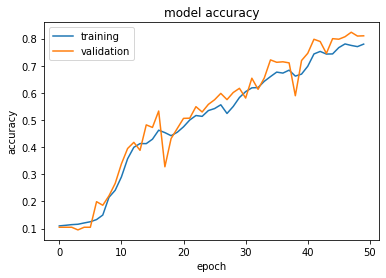


Test loss: 0.873
Test accuracy: 0.794
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]


In [ ]:
for layers in [5]: 
    print(layers*[32])
    model = create_dense([32] * layers)
    evaluate(model, batch_size=16, epochs=50, verbose=True)

#Discusión

Test loss: 0.873
Test accuracy: 0.794


# **6. Regularización en Redes Neuronales (4 puntos)**

Como se estudió en clase, la regularización permite obtener modelos que pueden generalizar de manera más precisa en un conjunto de test.

1. Investigue cómo añadir un término de regularización igual al estudiado en clase.
2. Modifique la función `create_dense`para que todas sus capas (i.e., inclusive la capa de salida) incluyan este término de regularización. Observe que Keras requiere que se especifique en cada capa dicho término. Fije el valor del parámetro de regularización en 1e-4.
3. Repita la sección 2, 3 y 4.2 usando el término de regularización

Discuta sus resultados

Tip: al definir el modelo use el parámetro `kernel_regularizer` (variable lambda en la teoría). Ver ayuda en [aquí](https://keras.io/api/layers/regularizers/)








**PARTE 1.** Solo se necesita conocer estas capas que 
exponen 3 argumentos de palabras clave:
  
  kernel_regularizer: Regularizador para aplicar una penalización en el núcleo de la capa 
  
  bias_regularizer: Regularizador para aplicar una penalización en el sesgo de la capa 
  
  activity_regularizer: Regularizador para aplicar una penalización en la salida de la capa

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 32)                25120     
                                                                 
 dense_105 (Dense)           (None, 32)                1056      
                                                                 
 dense_106 (Dense)           (None, 32)                1056      
                                                                 
 dense_107 (Dense)           (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
422/422 [==============================] - 4s 7ms/step - loss: 2.3529 - accuracy: 0.1068 - val_loss: 2.3001 - val_accuracy: 0.1097
Epoch 2/40
422/422 [===================

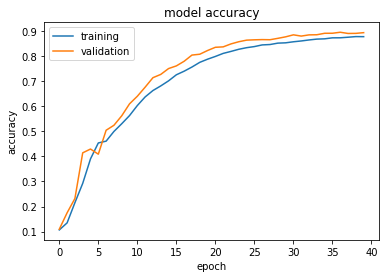


Test loss: 0.567
Test accuracy: 0.87
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 32)                25120     
                                                                 
 dense_109 (Dense)           (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 3s 5ms/step - loss: 1.4904 - accuracy: 0.6220 - val_loss: 1.0338 - val_accuracy: 0.8257
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.9417 - accuracy: 0.8113 - val_los

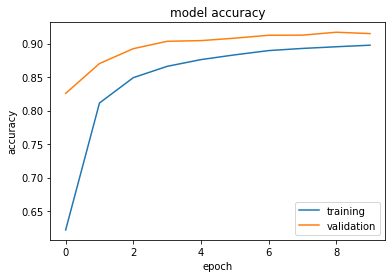


Test loss: 0.399
Test accuracy: 0.899
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 64)                50240     
                                                                 
 dense_111 (Dense)           (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 3s 5ms/step - loss: 1.1577 - accuracy: 0.7090 - val_loss: 0.7049 - val_accuracy: 0.8617
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.6578 - accuracy: 0.8568 - val_lo

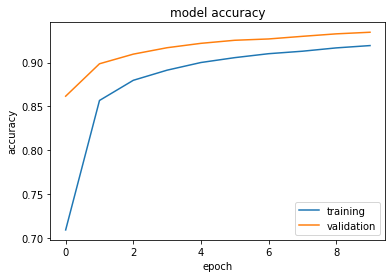


Test loss: 0.309
Test accuracy: 0.925
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (None, 128)               100480    
                                                                 
 dense_113 (Dense)           (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 3s 5ms/step - loss: 1.0705 - accuracy: 0.7300 - val_loss: 0.5904 - val_accuracy: 0.8782
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.5679 - accuracy: 0.8693 - val_

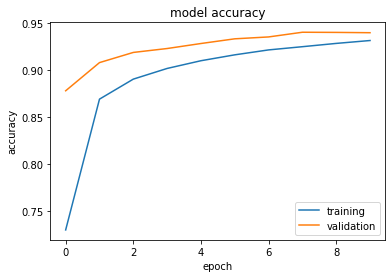


Test loss: 0.288
Test accuracy: 0.928
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 256)               200960    
                                                                 
 dense_115 (Dense)           (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 4s 8ms/step - loss: 0.9430 - accuracy: 0.7673 - val_loss: 0.5196 - val_accuracy: 0.8958
Epoch 2/10
422/422 [==============================] - 4s 9ms/step - loss: 0.5056 - accuracy: 0.8864 - val_

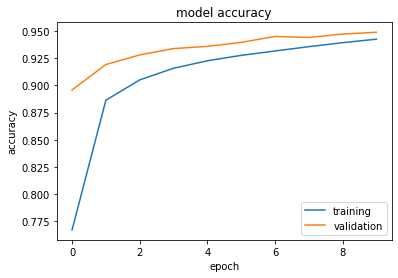


Test loss: 0.27
Test accuracy: 0.941
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 512)               401920    
                                                                 
 dense_117 (Dense)           (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 5s 10ms/step - loss: 0.8413 - accuracy: 0.8043 - val_loss: 0.4671 - val_accuracy: 0.9093
Epoch 2/10
422/422 [==============================] - 5s 11ms/step - loss: 0.4739 - accuracy: 0.8988 - val

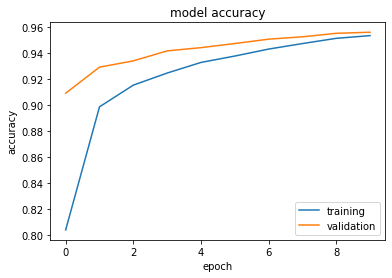


Test loss: 0.278
Test accuracy: 0.947
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_118 (Dense)           (None, 1024)              803840    
                                                                 
 dense_119 (Dense)           (None, 10)                10250     
                                                                 
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 9s 19ms/step - loss: 0.7586 - accuracy: 0.8376 - val_loss: 0.4485 - val_accuracy: 0.9263
Epoch 2/10
422/422 [==============================] - 8s 19ms/step - loss: 0.4578 - accuracy: 0.9155 - va

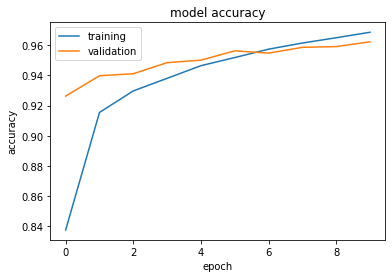


Test loss: 0.306
Test accuracy: 0.95
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 2048)              1607680   
                                                                 
 dense_121 (Dense)           (None, 10)                20490     
                                                                 
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 15s 33ms/step - loss: 0.7029 - accuracy: 0.8692 - val_loss: 0.4618 - val_accuracy: 0.9340
Epoch 2/10
422/422 [==============================] - 14s 33ms/step - loss: 0.4682 - accuracy: 0.9299

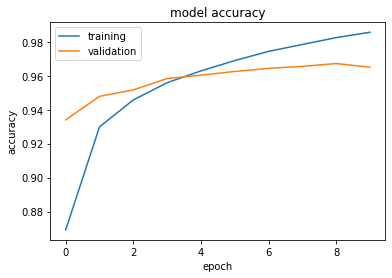


Test loss: 0.346
Test accuracy: 0.958
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_122 (Dense)           (None, 128)               100480    
                                                                 
 dense_123 (Dense)           (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
422/422 [==============================] - 3s 6ms/step - loss: 1.0652 - accuracy: 0.7320 - val_loss: 0.5862 - val_accuracy: 0.8807
Epoch 2/10
422/422 [==============================] - 3s 8ms/step - loss: 0.5635 - accuracy: 0.8715 - val_

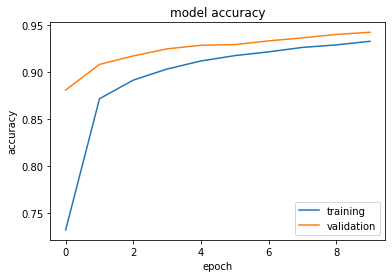


Test loss: 0.284
Test accuracy: 0.93
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_124 (Dense)           (None, 128)               100480    
                                                                 
 dense_125 (Dense)           (None, 128)               16512     
                                                                 
 dense_126 (Dense)           (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
422/422 [==============================] - 4s 9ms/step - loss: 2.0601 - accuracy: 0.5061 - val_loss: 1.735

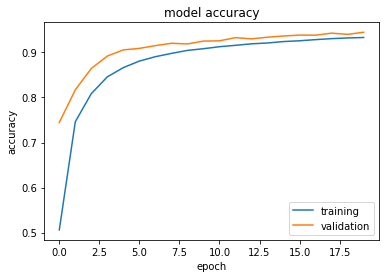


Test loss: 0.304
Test accuracy: 0.932
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_127 (Dense)           (None, 128)               100480    
                                                                 
 dense_128 (Dense)           (None, 128)               16512     
                                                                 
 dense_129 (Dense)           (None, 128)               16512     
                                                                 
 dense_130 (Dense)           (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
__________________________________________________

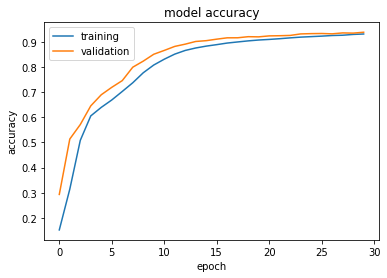


Test loss: 0.352
Test accuracy: 0.927
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_131 (Dense)           (None, 128)               100480    
                                                                 
 dense_132 (Dense)           (None, 128)               16512     
                                                                 
 dense_133 (Dense)           (None, 128)               16512     
                                                                 
 dense_134 (Dense)           (None, 128)               16512     
                                                                 
 dense_135 (Dense)           (None, 10)                1290      
                                                        

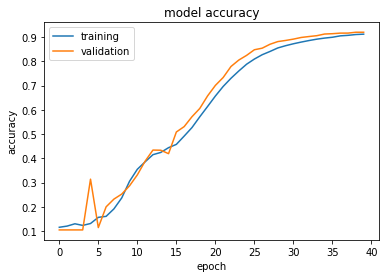


Test loss: 0.472
Test accuracy: 0.911
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]
Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_136 (Dense)           (None, 128)               100480    
                                                                 
 dense_137 (Dense)           (None, 128)               16512     
                                                                 
 dense_138 (Dense)           (None, 128)               16512     
                                                                 
 dense_139 (Dense)           (None, 128)               16512     
                                                                 
 dense_140 (Dense)           (None, 128)               16512     
                                                        

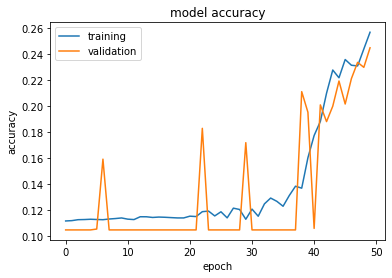


Test loss: 2.1
Test accuracy: 0.25
Shape of my predictions (test set): (10000, 10)
First prediction for number 2, probabilities: [0.004 0.046 0.885 0.003 0.    0.013 0.048 0.    0.002 0.   ]


In [ ]:

#PARTE 2 Modifique la función create_dense para que todas sus capas (i.e., inclusive la capa de salida) incluyan este término de regularización. 
#Observe que Keras requiere que se especifique en cada capa dicho término. Fije el valor del parámetro de regularización en 1e-4.
def create_dense(layer_sizes):
    model = Sequential()
    from tensorflow.keras import regularizers
    kernel_regularizer=regularizers.L2(1e-4)
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,),kernel_regularizer=regularizers.L2(1e-4),
                        bias_regularizer=regularizers.L2(1e-4),
                        activity_regularizer=regularizers.L2(1e-4)))#aqui añadir kernel_regularizer

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid', kernel_regularizer=regularizers.L2(1e-4),
                        bias_regularizer=regularizers.L2(1e-4),
                        activity_regularizer=regularizers.L2(1e-4))) #aqui añadir kernel_regularizer

    model.add(Dense(units=num_classes, activation='softmax', kernel_regularizer=regularizers.L2(1e-4),
                        bias_regularizer=regularizers.L2(1e-4),
                        activity_regularizer=regularizers.L2(1e-4)))
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
    return model

#PARTE 3 ESCRIBA SU CÓDIGO AQUÍ.
#2
model = create_dense([32] * 3) #Aquí ya se aplica la regularización por la definicion de create_dense
evaluate(model, batch_size=128, epochs=40, verbose=True) #verbose por defecto es false

#3
for nodes in [32, 64, 128, 256, 512, 1024, 2048]:
    #print(i)
    model = create_dense([nodes] * 1) #Aquí ya se aplica la regularización por la definicion de create_dense
    evaluate(model, batch_size=128, epochs=10, verbose=True) #verbose por defecto es false

#4.2
for layers in [1, 2, 3, 4, 5]:
    model = create_dense([128] * layers) #Aquí ya se aplica la regularización por la definicion de create_dense
    evaluate(model, batch_size=128, epochs=10*layers, verbose=True) #verbose por defecto es false

# **7. Comparación (2 puntos)**

Resuma todos sus resultados en una tabla donde se verifique la precisión en el conjunto de entrenamiento, validación y test para las diferentes arquitecturas entrenadas con los hiperparámetros modificados (i.e., # de epochs, batch size, # de nodos por capa oculta, # capas ocultas, con y sin regularización).

Discuta sus resultados.




Todos los datos fueron los mismos, sin embargo podemos observar el cambio solo agregandole una penalización L2.


Para el literal 2

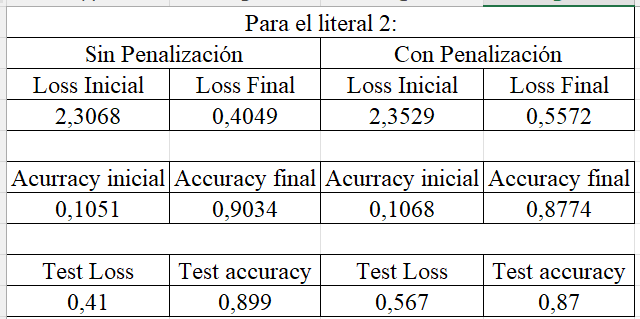

Para el literal 3:

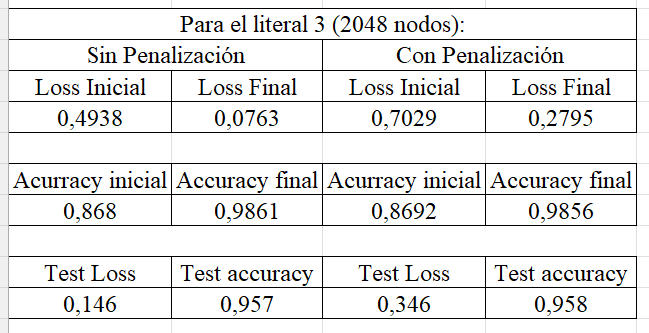

Para el literal 4.2: 

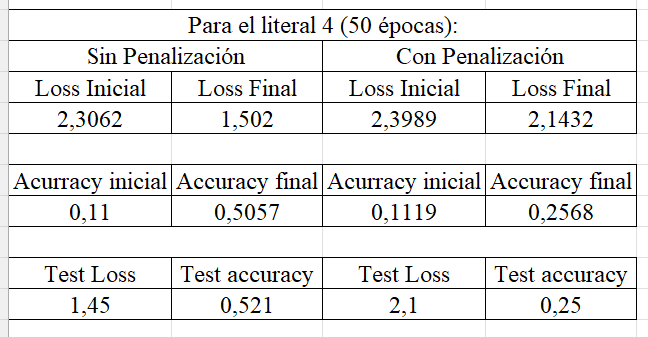

# **8. Conclusiones**

 El uso de redes neuronales es la mejor opcion para este tipo de problemas donde tenemos que clasificar, se combina todo lo que hemos visto en clases.

Del mismo modo,  todo proceso se puede optimizar y es lo que hemos presentado. primero agregando mas capas a nuestra red, luego agregando funciones para generalizar en cualquier modelo que querramos usar a futuro.

La decisión de aplicar o no una penalización en el entrenamiento de redes neuronales depende del problema específico que se esté tratando de resolver y del conjunto de datos que se esté utilizando. En el caso de este deber, usamos la regularización L2. Hay que evitar el overfitting haciendo esto, aunque depende del conjunto de datos, cuando tenemos grandes conjuntos de datos como el que tenemos en este ejemplo vemos que no cambió mucho agregando la penalización (no es tan necesario). 


# **9. Bibliografía**

En caso de ser necesario, incluya la bibliografía utilizada en formato IEEE. No olvide citar en el texto sus referencias donde sea pertinente.

* ciberseg1922 (2021) ¿Qué es epoch en machine learning?, Ciberseguridad. Available at: https://ciberseguridad.com/guias/nuevas-tecnologias/machine-learning/epoch/ (Accessed: March 27, 2023). 
* Furnieles, G. (2022) Sigmoid and Softmax functions in 5 minutes, Medium. Towards Data Science. Available at: https://towardsdatascience.com/sigmoid-and-softmax-functions-in-5-minutes-f516c80ea1f9 (Accessed: March 27, 2023). 
* Patrikar, S. (2019) Batch, Mini Batch &amp; stochastic gradient descent, Medium. Towards Data Science. Available at: https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a (Accessed: March 27, 2023). 
* Tf.keras.metrics.categorical_crossentropy &nbsp;: &nbsp; tensorflow V2.12.0 (no date) TensorFlow. Available at: https://www.tensorflow.org/api_docs/python/tf/keras/metrics/categorical_crossentropy (Accessed: March 27, 2023). 
* ¿Cuál es el tamaño del lote en la red neuronal? (no date) QA Stack. Available at: https://qastack.mx/stats/153531/what-is-batch-size-in-neural-network (Accessed: March 27, 2023).